# The Sparks Foundation-GRIP AUGUST 2021
# Name:Swamiraju Sanjana
# Data Science and Business Analytics intern
# Task1:Prediction using Supervised ML


# importing and reading the dataset

In [2]:
#importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data.head(10)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data

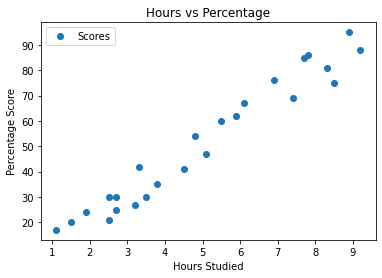

In [6]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data

In [7]:
#to divide the data into "attributes" (inputs) and "labels" (outputs).
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [8]:
#Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm¶

In [9]:
#We have split our data into training and testing sets, and now is finally the time to train our algorithm.
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# Plotting the regression line

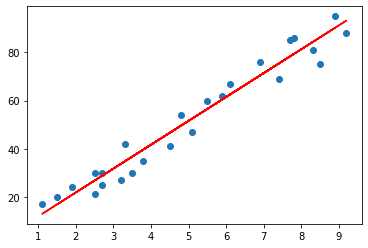

In [10]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,label='data')
plt.plot(X, line,label='line',color='r');
plt.show()

# Making predictions

In [21]:
hours = float(input())
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

9.25
No of Hours = 9.25
Predicted Score = 93.69173248737535


# Comparing actual result with predicted result

In [22]:
y_pred=regressor.predict(X_test)
diff=pd.DataFrame({'actual':y_test,'predicted':y_pred})
diff

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


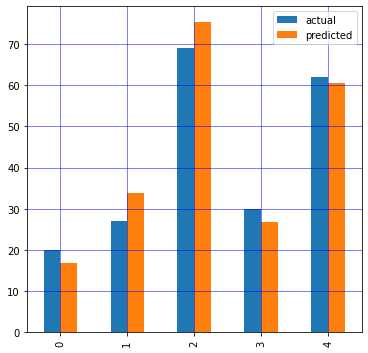

In [23]:
#plotting the bar graph
diff.plot(kind='bar',figsize=(6,6))
plt.grid(which='major',linewidth='0.5',color='blue')
plt.grid(which='minor',linewidth='0.5',color='red')
plt.show()


# Evaluating the model

In [24]:
#The final step is to evaluate the performance of algorithm.
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute Error:', 
      metrics.mean_squared_error(y_test, y_pred))



Mean Absolute Error: 4.183859899002975
Mean Absolute Error: 21.598769307217406


# Conclusion

1.The predicted score if a student studies for 9.25 hrs/day is 93.69173248737535
2.There is a positive linear relation between the number of study hours and the percentage of a student.